<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/PSO_cv06_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge Detection and Image Sharpening

In this lab we will detect edges in an image using convolutional operators and also methods of strengthening them in images.

## Convolution

Edges in images are usually present when there are large differences between intensities in neighboring pixels. This means that when differences between neighboring pixel values are high we can consider the area to be an edge. Differences are the discrete form of derivatives. Therefore in a way edge detection is a task of detecting areas of image where the derivatives (horizontal/vertical or their combination) have high absolute value.

To calculate differences on 2-dimensional images we utilize the convolutional operation. It is generally defined for two functions $f$ and $g$:

$$ (f \ast g)(t) = \int_{-\infty}^{\infty} f(x) g(t - x) dx.$$

It is mostly used if the support of one of the functions is compact. In the discrete case for "sequences" $a_i$ and $b_i$ for $ i \in \mathbb{Z}$. We define convolution as:

$$ (a \ast b)_j = \sum_{i \in \mathbb{Z}} a_i \cdot b_{j-i}.$$

In the image, however, we normally use a two-dimensional version with a very small kernel dimensions e.g. $3 \times 3$, $5 \times 5$, etc. Since these kernels are often symmetric for common image processing tasks, the term correlation is commonly conflated with convolution (the difference is in the sign of the expression). We can thus imagine the application of convolution as multiplying the neighborhood of a point with the kernel values and then adding the given values. Illustrated as:

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

[Animated image](https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif) by Michael Plotke licensed under [CC BY-SA 3.0 DEED](https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif)

We used convolution in the previous lab exercises. We used it to blur images.

### Exercise 1 - Image smoothing

In this exercise your goal is to smooth an image by directly using convolution. We will perform simple average smoothing. This means smoothing with a kernel of dimensions $5 \times 5$ with the form:

$$\frac{1}{25}\begin{pmatrix} 1 & 1 & 1 & 1 & 1 \\\\ 1 & 1 & 1 & 1 & 1 \\\\ 1 & 1 & 1 & 1 & 1  \\\\ 1 & 1 & 1 & 1 & 1  \\\\ 1 & 1 & 1 & 1 & 1 \end{pmatrix}.$$

Use the function `filter2D` form OpenCV and compare the output with the function `blur` on the image of the building. We also define a function to easily show grayscale images.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg

import cv2
import numpy as np
from matplotlib import pyplot as plt

def gshow(img, title=None):
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title(title)
  plt.axis('off')
  plt.show()

--2023-10-15 22:09:37--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57259 (56K) [image/jpeg]
Saving to: ‘building.jpg.1’

building.jpg.1      100%[===================>]  55.92K  --.-KB/s    in 0.01s   

2023-10-15 22:09:38 (3.71 MB/s) - ‘building.jpg.1’ saved [57259/57259]



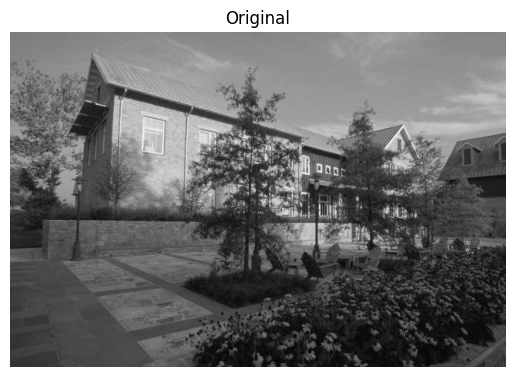

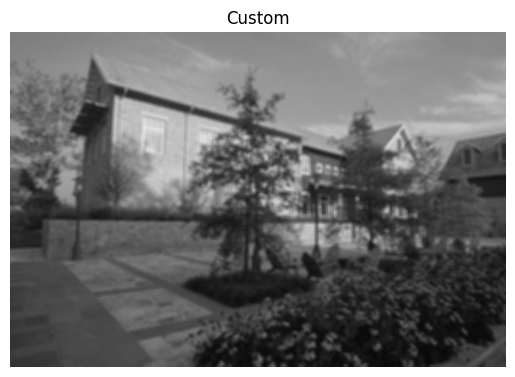

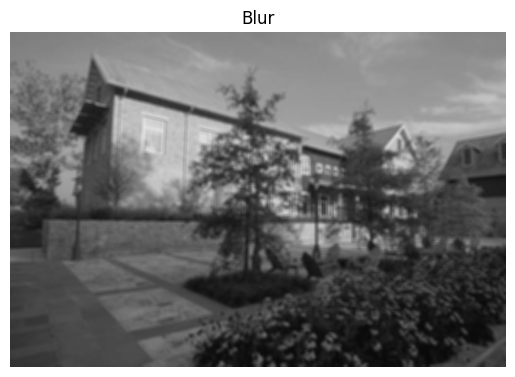

In [ ]:
...

## First order edge detectors

Now we will discuss the first order edge detectors. These detectors estimate the derivative using its discrete form.

We will use the Prewitt filter which has the kernel of the forms:

\begin{pmatrix}
  1 & 0 & -1 & \\\\
  1 & 0 & -1 & \\\\
  1 & 0 & -1 &
\end{pmatrix}

and

\begin{pmatrix}
  1 & 1 & 1 \\\\
  0 & 0 & 0 \\\\
  -1 & - 1 & -1
\end{pmatrix}

These two calculate the horizontal and vertical edges. To calculate a single value we use the norm of the gradient:

$$ ||\nabla I|| = \sqrt{d_x^2 + d_y^2}.$$

There are other kernels which are similar. Such as the Roberts and Sobel filters.

Edge detection can fail with noisy image. Add noise to the image and try to detect edges in the image.

### Exercise 2 - Prewitt and Sobel filter

Calculate the gradient of an image with the Prewitt filter using `filter2D`. Calculate the gradient also using the Sobel filter with the method `Sobel`.  Try to calculate the gradient after smoothing. Does the result improve?




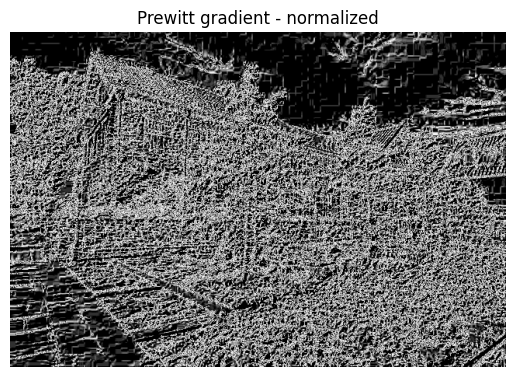

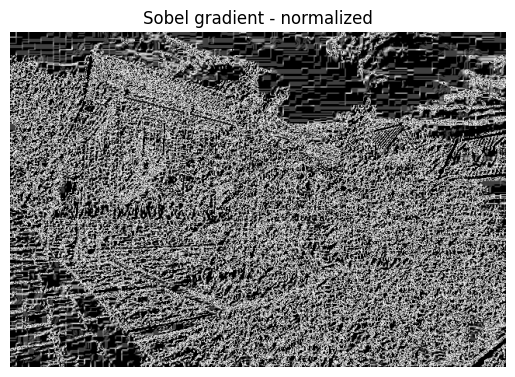

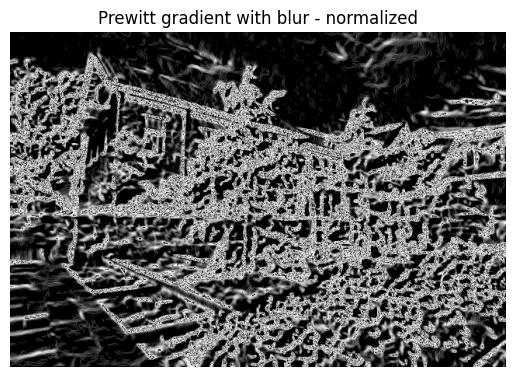

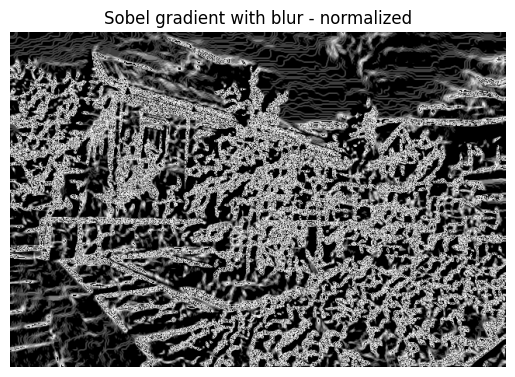

In [ ]:
...

## Canny detector

Canny detection method uses first derivatives in multiple steps.

* Smoothing - Canny detector first smooths the image using the Gaussian filter.
* Non-maximum suppression - After smoothing a different detector using the first derivative is used. Since simple methods create edges too wide. In each area only the strongest edge is kept. This takes the direction of the edge into consideration.  
* Weak and strong edges - In the end two thresholds are used to divide the remaining edge pixels to two categories: strong and weak edges. Strong edges are kept. From the weak edges only the ones connected to the strong edges are kept.

### Exercise 3 - Canny Edge Detector

Test the Canny edge detector by using the `Canny` function.

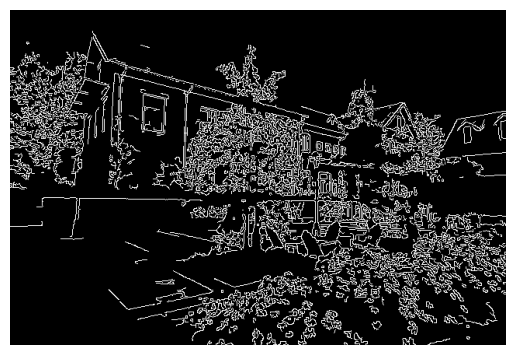

In [ ]:
...

<!-- ## Second order edge detection - Marr Hildreth method

We can also use the second derivatives. We are looking for local optima of the derivatives, but these occur when the second order derivative is zero. In the discrete case we are interested in areas of the image where the second order derivative changes sign.

To obtain the second derivative the Laplacian of Gaussian filter is used.
$$ LoG = -\frac{1}{\pi \sigma^4} \left[ 1 - \frac{x^2 + y^2}{2\sigma^2} \right] e^{-\frac{x^2+y^2}{2\sigma^2}}$$

After application of the filter the zero-crossings have to be found. It is possible to use difference of Gaussians (DoG) instead of LoG. -->


## Image sharpening

Sometimes we may wish to enhance edges in an image. This is known as image sharpening.

### Exercise 4 - Unsharp Masking

One way of sharpening is unsharp masking. The original image is combined with a smoothed version to find edges.

$$I_{sharp} = I_{original} + p \cdot \left( I_{original} - I_{smooth} \right)$$

Create a function `unsharp_mask(img,p,sigma)`, which applies unsharp masking with the parameter p with the use of addiive Gaussian noise with the parameter sigma. Apply this on the image downloaded below.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/blurred.png

--2023-10-15 22:21:24--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/blurred.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296904 (290K) [image/png]
Saving to: ‘blurred.png’

blurred.png         100%[===================>] 289.95K  --.-KB/s    in 0.04s   

2023-10-15 22:21:24 (6.54 MB/s) - ‘blurred.png’ saved [296904/296904]



In [ ]:
def unsharp_mask(img, p, sigma):
  ...

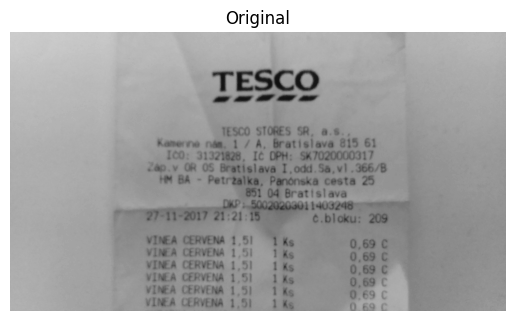

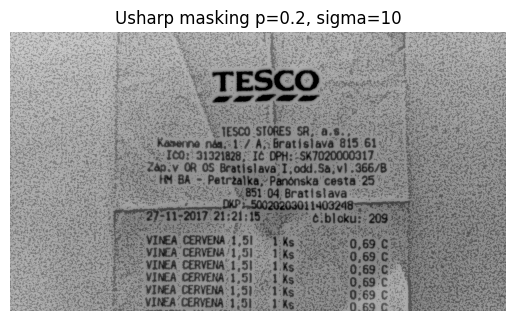

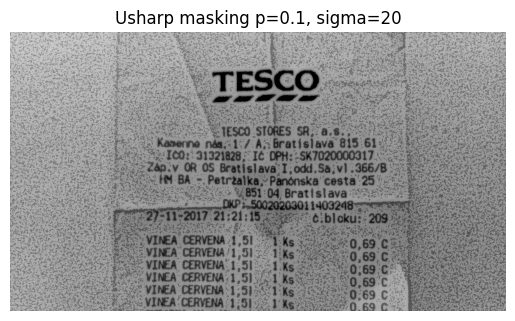

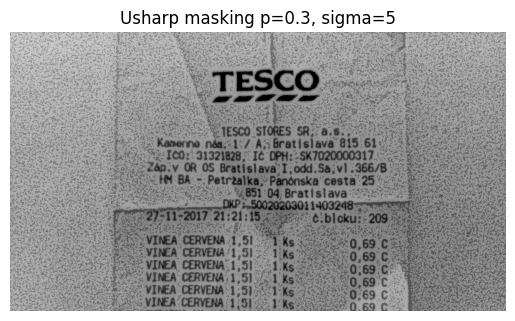

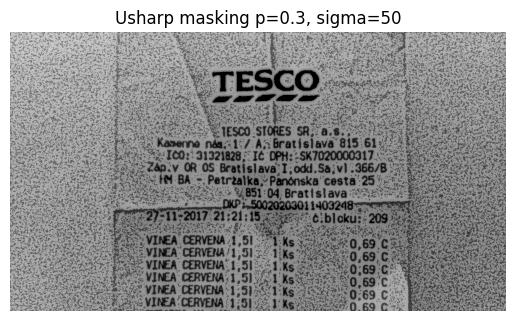

In [ ]:
img = cv2.imread('blurred.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gshow(img, title='Original')
gshow(unsharp_mask(img, 0.2, 10), title='Usharp masking p=0.2, sigma=10')
gshow(unsharp_mask(img, 0.2, 20), title='Usharp masking p=0.1, sigma=20')
gshow(unsharp_mask(img, 0.2, 5), title='Usharp masking p=0.3, sigma=5')
gshow(unsharp_mask(img, 0.3, 50), title='Usharp masking p=0.3, sigma=50')

## Exercise 5 - Laplace Operator

We can also use the laplace (2nd order derivative) operator:

$$\Delta f = \nabla \cdot \nabla f = \sum_{i=1}^n \frac{\partial^2 f}{\partial x_i^2} \stackrel{2D}{=} \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

Which has the discrete form with kernel:
  \begin{bmatrix}
  0 & 1 & 0 \\\\
  1 & -4 & 1 \\\\
  0 & 1 & 0
  \end{bmatrix}

It can be used to sharpen the image in the following way:
$$I_{sharp} = I_{original} - p \left( L_{kernel} \ast I_{original}\right)$$

Implement the function `laplace_sharpen(img, p)` which takes the image and the parameter $p$ on the input and outputs the image sharpened using the Laplace operator.

Try this on the `blurred.png` image. You can use the OpenCV `Laplacian` function.

In [ ]:
def laplace_sharpen(img, p):
  ...

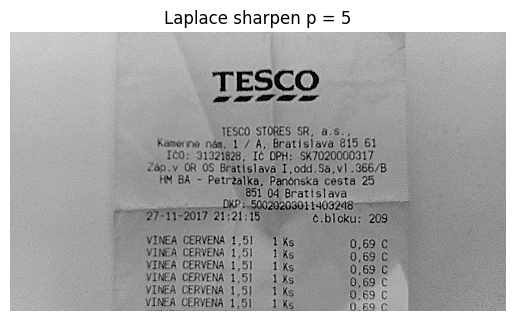

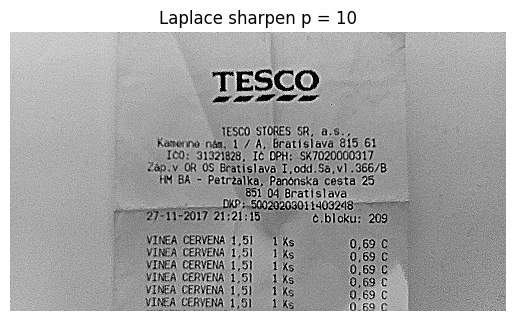

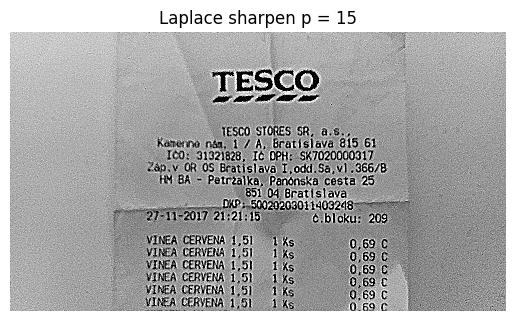

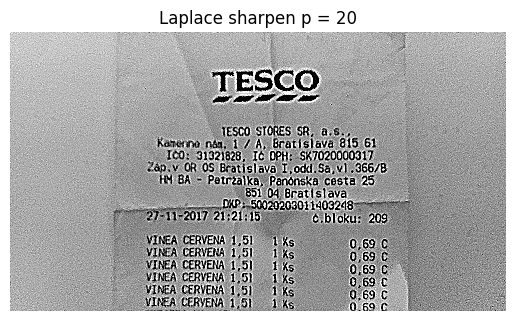

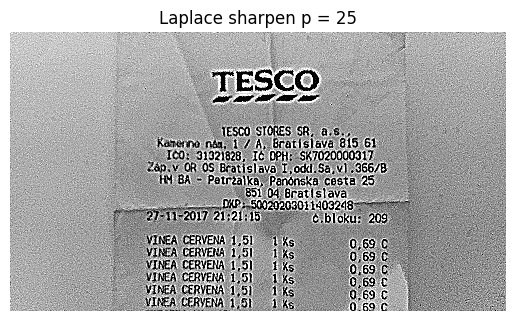

In [ ]:
img = cv2.imread('blurred.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for p in range(5, 26, 5):
  gshow(255 * laplace_sharpen(img, p), title='Laplace sharpen p = {}'.format(p))